# Drawings

Here's what the drawing.py module can do.


In [1]:
from drawing import Drawing, Line, Point, Circle, Rectangle, CrudeLine, Polygon, Text

In [2]:

# 1. Create a drawing object to hold all the pieces.
demo = Drawing(width=800, height=300)

# 2. Add some shapes to it.

demo.add( Line(Point(20, 40), Point(600, 150), color='yellow', line_width=4) )
demo.add( Circle(Point(300, 120), 50, color='#aa00cc99', outline='cyan') )
demo.add( Polygon( (Point(380, 280), Point(400, 200), 
                    Point(500, 230), Point(590, 200), Point(630, 250)),
                    color='blue', outline='white') )
demo.add( Rectangle( Point(700, 200), Point(750, 270), color=None, outline='red') )
(p1, p2, p3) = (Point(100,220), Point(150, 100), Point(200, 130))
demo.add( CrudeLine(p1, p2) )
demo.add( CrudeLine(p2, p3) )
demo.add( CrudeLine(p3, p1) )
demo.add( Text(Point(550, 80), "It's a demo!", face='40px Averia', color='floralwhite' ))

# 3. Render and display the drawing below this cell.

demo.draw()

Drawing(height=300, sync_image_data=True, width=800)

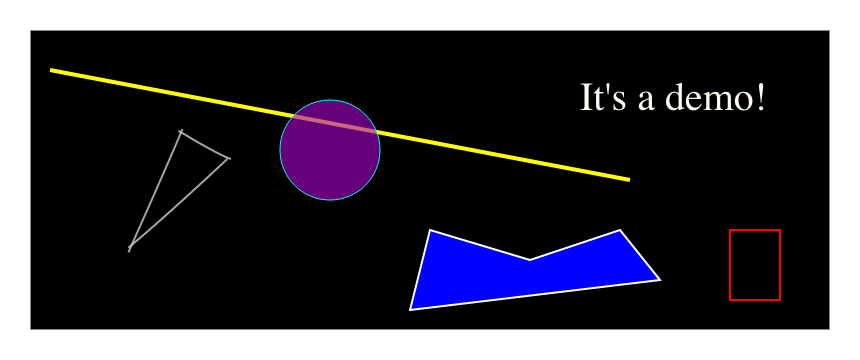

In [3]:
# Save a png image of the drawing to a file. 
# (This only works in another cell below the drawing, after it's been displayed.)
demo.write_file('demo.png')
demo.display()

In [4]:
print("Crude Stars")        

def star(center, size, color, drawing, crudity):
    from numpy import pi, sin, cos
    for i in range(5):
        theta0 = 4 * pi * i / 5
        theta1 = 4 * pi * (i+1) / 5
        # Points, like mathemetcial vectors, can be added togehter and multiplied by scalars.
        point_a = center + size * Point(cos(theta0), sin(theta0)) # vector + scalar * vector
        point_b = center + size * Point(cos(theta1), sin(theta1))
        drawing.add( CrudeLine(point_a, point_b, color=color, crudity=crudity ) )

sky = Drawing()
points = ((300,300), (100,180), (150,400), (380,120))
sizes = (50, 40, 60, 80)
colors = ('blue', 'green', 'yellow', 'red')
for (xy, size, color) in zip(points, sizes, colors):
    star(Point(*xy), size, color, sky, 5)
sky.draw()

Crude Stars


Drawing(sync_image_data=True, width=500)

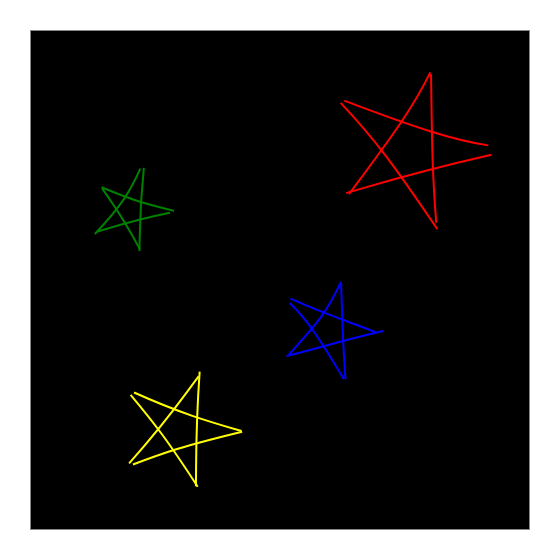

In [5]:
sky.write_file('stars.png')
sky.display()

In [6]:
# Here's the example from the drawing.py documentation.
d = Drawing(200, 200, background='#999999')
d.add( Rectangle(Point(10, 10), Point(180, 160), color='#aaccee') )
d.add( Polygon([Point(30, 40), Point(40, 100), Point(150, 130)], outline='black', color=None) )
d.add( Circle(Point(100, 100), radius=40, color='#996633cc'))
d.add( Text(Point(50, 185), "It's a drawing!", face="20px Times", color='darkblue' ) )
d.draw()

Drawing(height=200, sync_image_data=True, width=200)

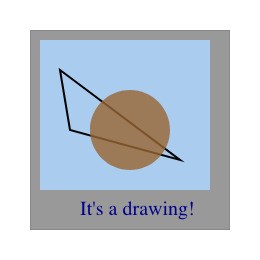

In [7]:
d.display()

In [8]:
# Let's see what some points look like ...
dots = Drawing(200, 200)
def random_point(drawing):
    from random import randint
    return Point(randint(0, drawing.width), randint(0, drawing.height))
for i in range(1000):
    dots.add(random_point(dots))
dots.draw()

Drawing(height=200, sync_image_data=True, width=200)

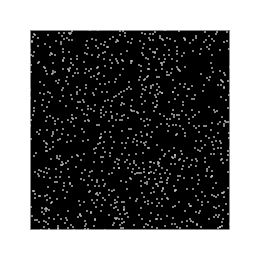

In [9]:
dots.display()

In [10]:
# Sol Levitt's wall drawing 86 
# See https://massmoca.org/event/walldrawing86/
# "Ten thousand lines about 10 inchaes (25 cm) long, covering the wall evenly."
#
# Let's assume that the wall is 10 feet by 10 feet and about" means 90% to 110% of 10 inches.
# The result is going to be strongly depenendent on the thickness of the line compared
# to the size of the canvas ... I'm not sure I have the resolution here to get pencil width.
# At least, with the values here, the line density is much higher than on the massmocha image.

wall_inches = 12 * 12  # 12 feet
line_inches = 10       
wall_pixels = 2000                                    
line_pixels = wall_pixels * line_inches / wall_inches
line_color = '#333333cc'       # fairly dark, mostly opaque
background = '#dddddd'    # fairly white
n_lines = 10000

wall86 = Drawing(width=wall_pixels, height=wall_pixels, background=background)

In [11]:

def random_line(min_length, max_length, drawing):
    from random import randint, random
    from numpy import pi, sin, cos
    max_attempts = 100  # trying to find a line that's on the wall
    attempts = 0
    while attempts < max_attempts:
        attempts += 1
        x0 = randint(0, drawing.width)
        y0 = randint(0, drawing.height)
        theta = 2 * pi * random()
        length = min_length + (max_length - min_length) * random()
        x1 = x0 + length * cos(theta)
        y1 = y0 + length * sin(theta)
        if 0 <= x0 <= drawing.width and \
           0 <= x1 <= drawing.width and \
           0 <= y0 <= drawing.height and \
           0 <= y1 <= drawing.height:
            return CrudeLine(Point(x0,y0), Point(x1,y1), 
                             line_width=1, crudity=4, color=line_color)
        
for i in range(n_lines):
    wall86.add( random_line(0.9 * line_pixels, 
                            1.1 * line_pixels, 
                            wall86) )
    
wall86.draw()

Drawing(height=2000, sync_image_data=True, width=2000)

In [12]:
wall86.write_file('wall86.png')

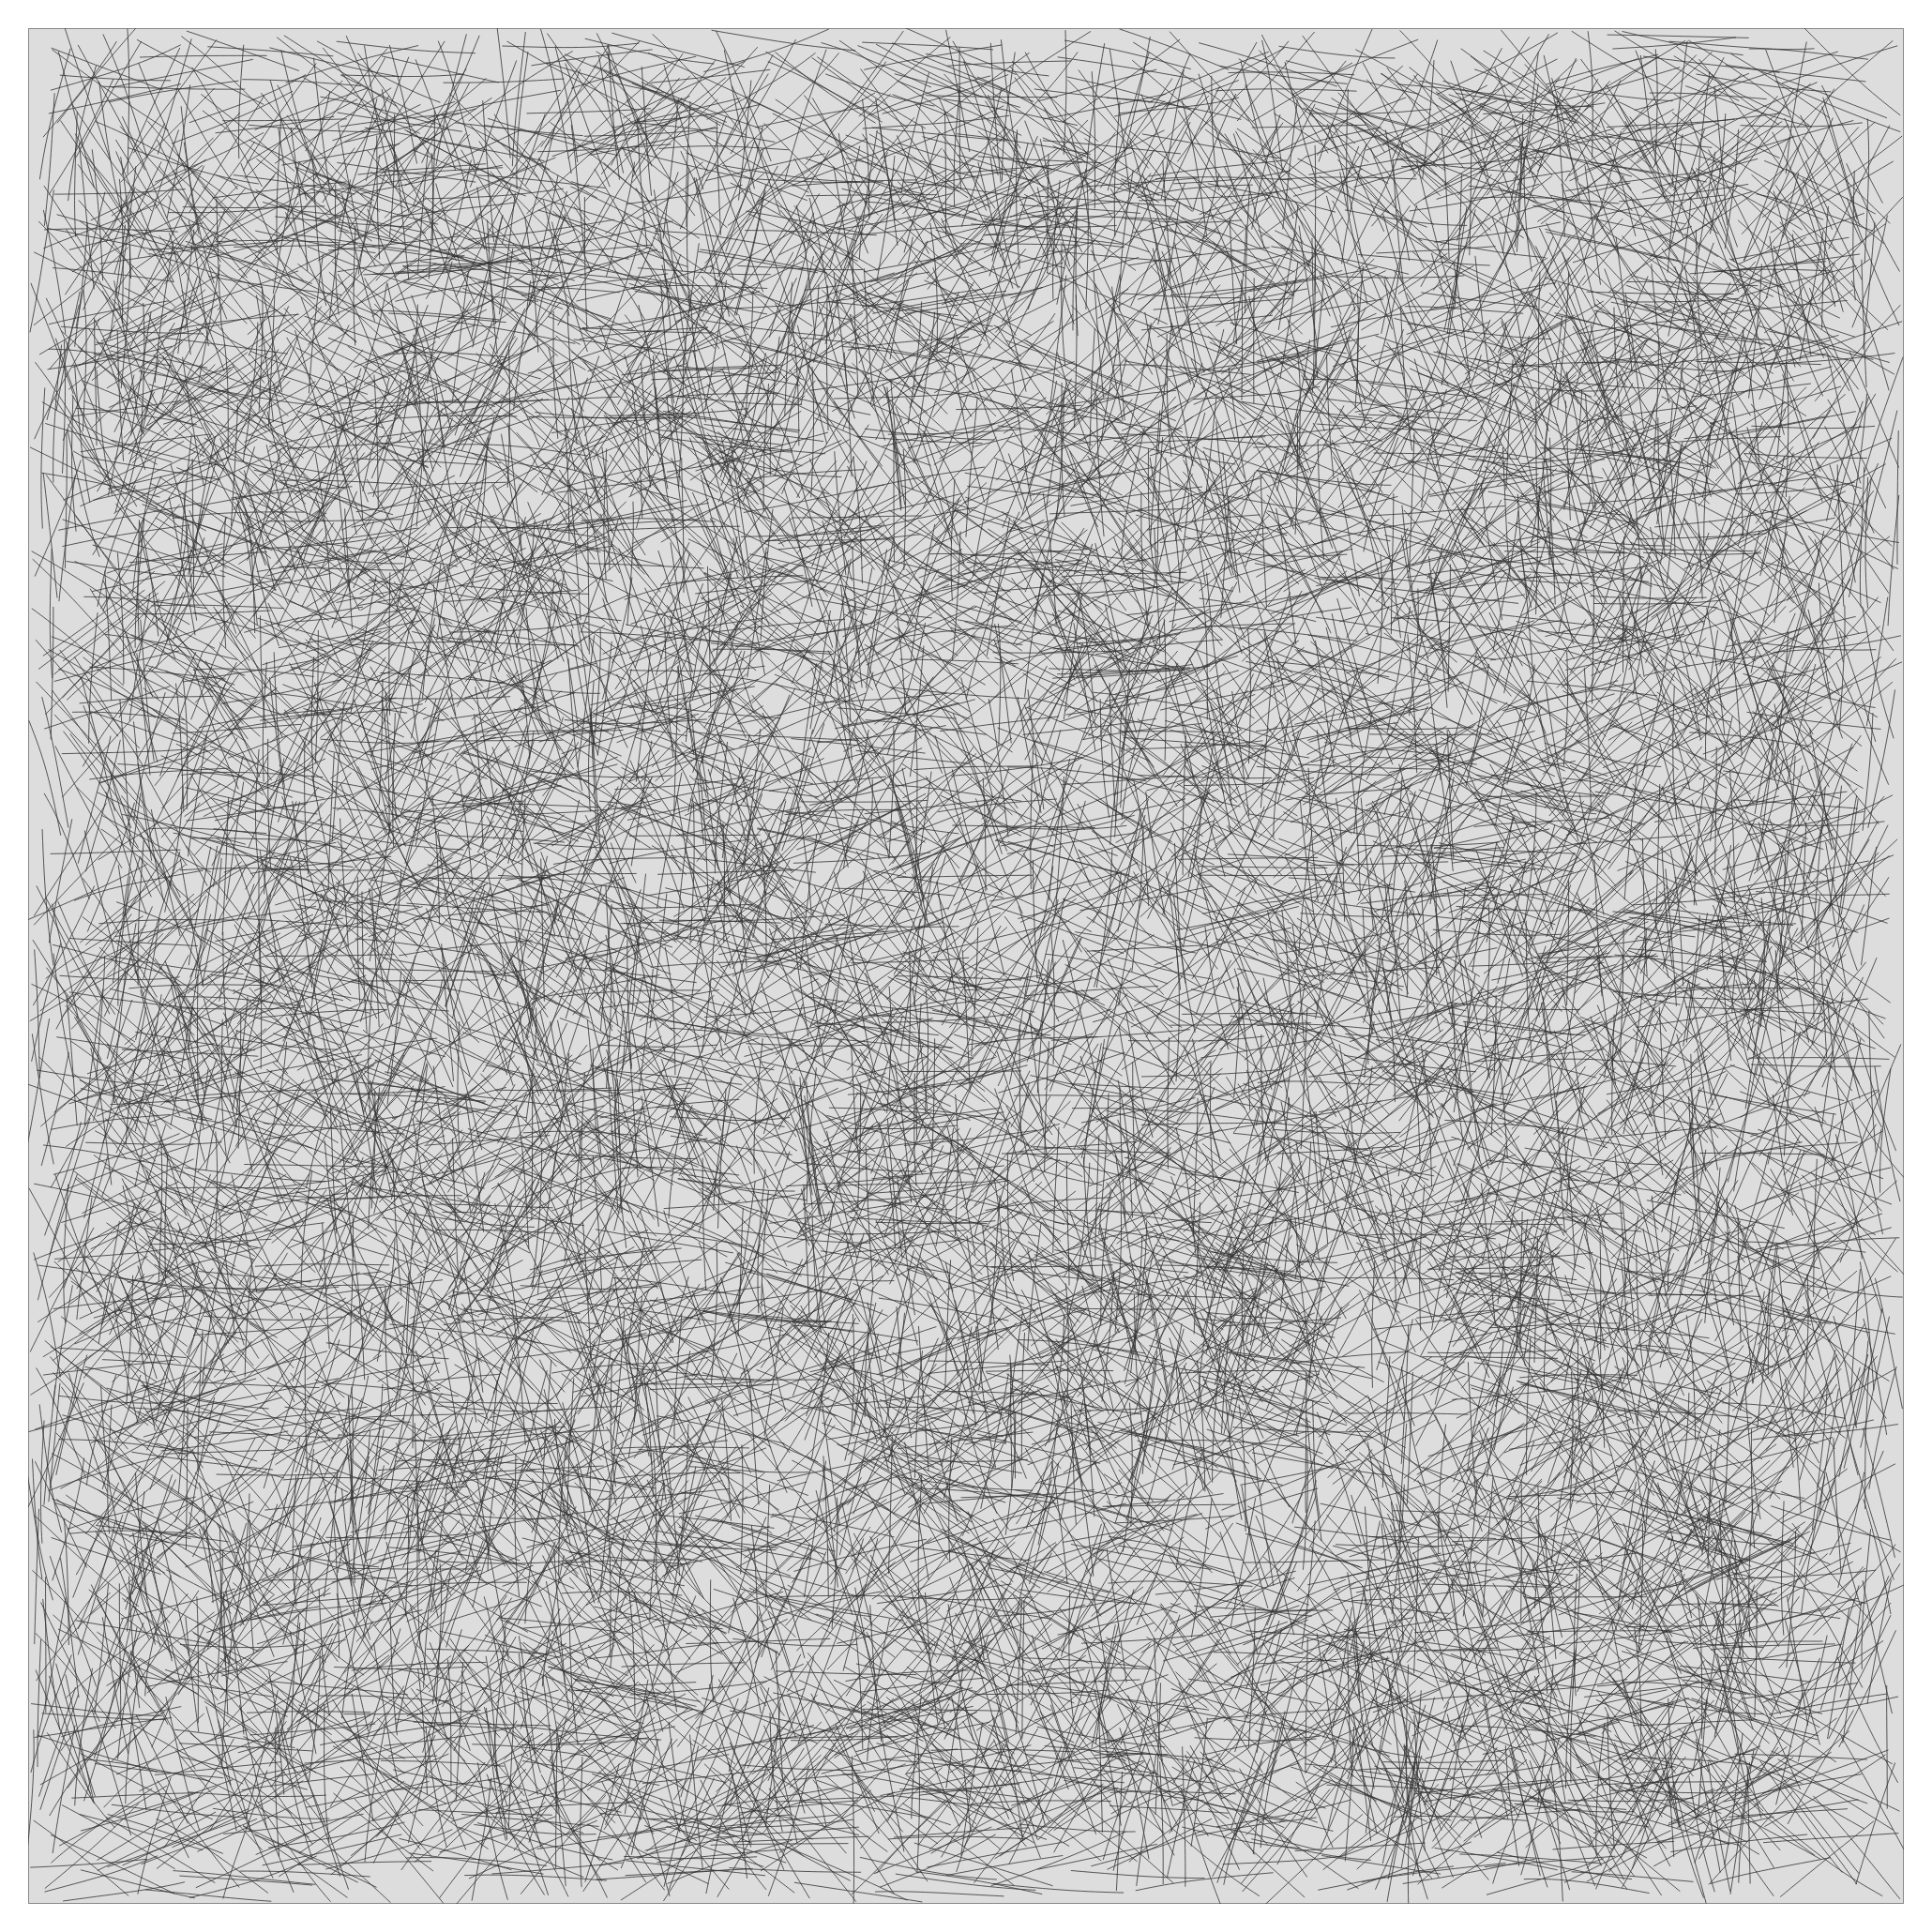

In [13]:
wall86.display()